In [6]:
import pandas as pd

table1 = pd.read_csv("Table_01_Size_of_UK_Airports-Cleaned.csv")
table10_2 = pd.read_csv("Table_10_2_Domestic_Terminal_Pax-Cleaned.csv")
table12_2 = pd.read_csv("Table_12_2_Domestic_Route_Pax-Cleaned.csv")
table12_3 = pd.read_csv("Table_12_3_Route_Pax_By_Airport-Cleaned.csv")

print("Table_01_Size_of_UK_Airports-Cleaned")
print("Table_10_2_Domestic_Terminal_Pax-Cleaned")
print("Table_12_2_Domestic_Route_Pax-Cleaned")
print("Table_12_3_Route_Pax_By_Airport-Cleaned")


Table_01_Size_of_UK_Airports-Cleaned
Table_10_2_Domestic_Terminal_Pax-Cleaned
Table_12_2_Domestic_Route_Pax-Cleaned
Table_12_3_Route_Pax_By_Airport-Cleaned


In [7]:
table1.rename(columns={
    'pax_total this_year_total_pax': 'this_year_total_pax',
    'airport_name': 'airport_name',
    'Airport Year': 'year'
}, inplace=True)

print(table1.columns)


Index(['rundate', 'year', 'airport_name', 'pax_current', 'pax_total',
       'pax_5y_prev', 'pax_5y_prev_total', 'growth_5y_pct', 'cagr_5y'],
      dtype='object')


In [14]:
def classify_airport(pax):
    if pax > 25000000:
        return "Large"
    elif pax > 5000000:
        return "Medium"
    else:
        return "Small"

table1['airport_size'] = table1['pax_total'].apply(classify_airport)

print(table1[['airport_name', 'pax_total', 'airport_size']].head())


  airport_name  pax_total airport_size
0     HEATHROW  272829990        Large
1      GATWICK  272829990        Large
2   MANCHESTER  272829990        Large
3     STANSTED  272829990        Large
4        LUTON  272829990        Large


  airport_name  pax_total airport_size
0     HEATHROW  272829990        Large
1      GATWICK  272829990        Large
2   MANCHESTER  272829990        Large
3     STANSTED  272829990        Large
4        LUTON  272829990        Large


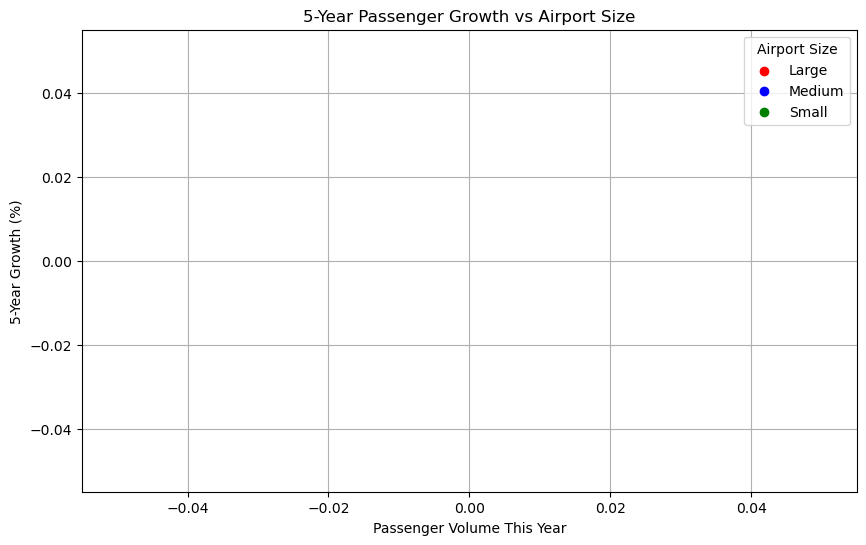

Top 10 Airports by 5-Year Growth:
            airport_name  pax_total  growth_5y_pct  cagr_5y airport_size
0               HEATHROW  272829990            NaN      NaN        Large
1                GATWICK  272829990            NaN      NaN        Large
2             MANCHESTER  272829990            NaN      NaN        Large
3               STANSTED  272829990            NaN      NaN        Large
4                  LUTON  272829990            NaN      NaN        Large
5              EDINBURGH  272829990            NaN      NaN        Large
6             BIRMINGHAM  272829990            NaN      NaN        Large
7                BRISTOL  272829990            NaN      NaN        Large
8                GLASGOW  272829990            NaN      NaN        Large
9  BELFAST INTERNATIONAL  272829990            NaN      NaN        Large


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

table1 = pd.read_csv("Table_01_Size_of_UK_Airports-Cleaned.csv")

def classify_airport(pax):
    if pax > 25000000:
        return "Large"
    elif pax > 5000000:
        return "Medium"
    else:
        return "Small"

table1['airport_size'] = table1['pax_total'].apply(classify_airport)

print(table1[['airport_name', 'pax_total', 'airport_size']].head())


colors = {'Large': 'red', 'Medium': 'blue', 'Small': 'green'}
table1['color'] = table1['airport_size'].map(colors)

plt.figure(figsize=(10,6))
plt.scatter(
    table1['pax_total'],
    table1['growth_5y_pct'],
    c=table1['color'],
    s=100
)

plt.title("5-Year Passenger Growth vs Airport Size")
plt.xlabel("Passenger Volume This Year")
plt.ylabel("5-Year Growth (%)")

for size in colors:
    plt.scatter([], [], c=colors[size], label=size)
plt.legend(title='Airport Size')

plt.grid(True)
plt.show()

table1['rank_growth'] = table1['growth_5y_pct'].rank(ascending=False)
top_growth_airports = table1.sort_values(by='growth_5y_pct', ascending=False).head(10)

print("Top 10 Airports by 5-Year Growth:")
print(top_growth_airports[['airport_name', 'pax_total', 'growth_5y_pct', 'cagr_5y', 'airport_size']])


In [23]:
table1 = pd.read_csv("Table_01_Size_of_UK_Airports-Cleaned.csv")

table1['growth_5y_pct'] = ((table1['pax_total'] - table1['pax_5y_prev_total']) / table1['pax_5y_prev_total']) * 100

table1['cagr_5y'] = ((table1['pax_total'] / table1['pax_5y_prev_total']) ** (1/5) - 1) * 100

print(table1[['airport_name','pax_total','pax_5y_prev_total','growth_5y_pct','cagr_5y']].head())


  airport_name  pax_total  pax_5y_prev_total  growth_5y_pct   cagr_5y
0     HEATHROW  272829990          292244892      -6.643367 -1.365457
1      GATWICK  272829990          292244892      -6.643367 -1.365457
2   MANCHESTER  272829990          292244892      -6.643367 -1.365457
3     STANSTED  272829990          292244892      -6.643367 -1.365457
4        LUTON  272829990          292244892      -6.643367 -1.365457


In [26]:
table1['pax_total'].nunique()

1

In [27]:
table1.groupby('airport_name')['pax_total'].nunique()

airport_name
ABERDEEN                          1
BARRA                             1
BELFAST CITY (GEORGE BEST)        1
BELFAST INTERNATIONAL             1
BENBECULA                         1
BIGGIN HILL                       1
BIRMINGHAM                        1
BLACKPOOL                         1
BOURNEMOUTH                       1
BRISTOL                           1
CAMPBELTOWN                       1
CARDIFF WALES                     1
CITY OF DERRY (EGLINTON)          1
DONCASTER SHEFFIELD               1
DUNDEE                            1
EAST MIDLANDS INTERNATIONAL       1
EDINBURGH                         1
EXETER                            1
FARNBOROUGH                       1
GATWICK                           1
GLASGOW                           1
HEATHROW                          1
HUMBERSIDE                        1
INVERNESS                         1
ISLAY                             1
ISLES OF SCILLY (ST.MARYS)        1
KIRKWALL                          1
LANDS END (ST J

In [28]:
table1[['airport_name', 'pax_current']].head(10)

,airport_name,pax_current
0,HEATHROW,79149042
1,GATWICK,40894242
2,MANCHESTER,28077659
3,STANSTED,27951116
4,LUTON,16399866
5,EDINBURGH,14395463
6,BIRMINGHAM,11479335
7,BRISTOL,9911879
8,GLASGOW,7355987
9,BELFAST INTERNATIONAL,5956888


In [29]:
table1['pax_current'].nunique()

48

In [37]:
table1['growth_5y_pct'] = (
    (table1['pax_current'] - table1['pax_5y_prev']) 
    / table1['pax_5y_prev']
) * 100

table1['cagr_5y'] = (
    (table1['pax_current'] / table1['pax_5y_prev']) ** (1/5) - 1
) * 100


In [36]:
table1[['airport_name','pax_current','pax_5y_prev','growth_5y_pct','cagr_5y']].head()

,airport_name,pax_current,pax_5y_prev,growth_5y_pct,cagr_5y
0,HEATHROW,79149042,80100311,-1.187597,-0.238656
1,GATWICK,40894242,46081327,-11.256371,-2.360075
2,MANCHESTER,28077659,28254970,-0.627539,-0.125824
3,STANSTED,27951116,27995121,-0.157188,-0.031457
4,LUTON,16399866,16766552,-2.187009,-0.441279


In [38]:
def classify_airport(pax):
    if pax >= 25_000_000:
        return "Large"
    elif pax >= 5_000_000:
        return "Medium"
    else:
        return "Small"

table1['airport_size'] = table1['pax_current'].apply(classify_airport)

In [44]:
table1.head()

,rundate,year,airport_name,pax_current,pax_total,pax_5y_prev,pax_5y_prev_total,growth_5y_pct,cagr_5y,airport_size,color,rank_growth
0,19/03/2024 12:52,2023,HEATHROW,79149042,272829990,80100311,292244892,NaN,NaN,Large,red,NaN
1,19/03/2024 12:52,2023,GATWICK,40894242,272829990,46081327,292244892,NaN,NaN,Large,red,NaN
2,19/03/2024 12:52,2023,MANCHESTER,28077659,272829990,28254970,292244892,NaN,NaN,Large,red,NaN
3,19/03/2024 12:52,2023,STANSTED,27951116,272829990,27995121,292244892,NaN,NaN,Large,red,NaN
4,19/03/2024 12:52,2023,LUTON,16399866,272829990,16766552,292244892,NaN,NaN,Large,red,NaN


In [45]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rundate            49 non-null     object 
 1   year               49 non-null     int64  
 2   airport_name       49 non-null     object 
 3   pax_current        49 non-null     int64  
 4   pax_total          49 non-null     int64  
 5   pax_5y_prev        49 non-null     int64  
 6   pax_5y_prev_total  49 non-null     int64  
 7   growth_5y_pct      0 non-null      float64
 8   cagr_5y            0 non-null      float64
 9   airport_size       49 non-null     object 
 10  color              49 non-null     object 
 11  rank_growth        0 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.9+ KB


In [46]:
table1.groupby('airport_name')['year'].nunique().sort_values(ascending=False).head(10)

airport_name
ABERDEEN                      1
ISLES OF SCILLY (ST.MARYS)    1
LANDS END (ST JUST)           1
LEEDS BRADFORD                1
LERWICK (TINGWALL)            1
LIVERPOOL (JOHN LENNON)       1
LONDON CITY                   1
LUTON                         1
LYDD                          1
MANCHESTER                    1
Name: year, dtype: int64

In [47]:
table1['growth_5y_pct'] = (
    (table1['pax_current'] - table1['pax_5y_prev'])
    / table1['pax_5y_prev']
) * 100

In [48]:
table1[['airport_name','pax_current','pax_5y_prev','growth_5y_pct']].head()

,airport_name,pax_current,pax_5y_prev,growth_5y_pct
0,HEATHROW,79149042,80100311,-1.187597
1,GATWICK,40894242,46081327,-11.256371
2,MANCHESTER,28077659,28254970,-0.627539
3,STANSTED,27951116,27995121,-0.157188
4,LUTON,16399866,16766552,-2.187009


In [49]:
table1['cagr_5y'] = (
    (table1['pax_current'] / table1['pax_5y_prev']) ** (1/5) - 1
) * 100

In [50]:
table1[['airport_name','growth_5y_pct','cagr_5y']].head()

,airport_name,growth_5y_pct,cagr_5y
0,HEATHROW,-1.187597,-0.238656
1,GATWICK,-11.256371,-2.360075
2,MANCHESTER,-0.627539,-0.125824
3,STANSTED,-0.157188,-0.031457
4,LUTON,-2.187009,-0.441279


In [51]:
table1.sort_values('cagr_5y', ascending=False).head(10)

,rundate,year,airport_name,pax_current,pax_total,pax_5y_prev,pax_5y_prev_total,growth_5y_pct,cagr_5y,airport_size,color,rank_growth
34,19/03/2024 12:52,2023,FARNBOROUGH,38827,272829990,0,292244892,inf,inf,Large,red,NaN
43,19/03/2024 12:52,2023,BIGGIN HILL,6495,272829990,1674,292244892,287.992832,31.148927,Large,red,NaN
26,19/03/2024 12:52,2023,TEESSIDE INTERNATIONAL AIRPORT,226326,272829990,139549,292244892,62.183892,10.154323,Large,red,NaN
35,19/03/2024 12:52,2023,DUNDEE,32862,272829990,21185,292244892,55.119188,9.177490,Large,red,NaN
17,19/03/2024 12:52,2023,BOURNEMOUTH,950028,272829990,674972,292244892,40.750727,7.075505,Large,red,NaN
7,19/03/2024 12:52,2023,BRISTOL,9911879,272829990,8696653,292244892,13.973491,2.650429,Large,red,NaN
25,19/03/2024 12:52,2023,SUMBURGH,258478,272829990,245766,292244892,5.172400,1.013718,Large,red,NaN
5,19/03/2024 12:52,2023,EDINBURGH,14395463,272829990,14291811,292244892,0.725254,0.144632,Large,red,NaN
3,19/03/2024 12:52,2023,STANSTED,27951116,272829990,27995121,292244892,-0.157188,-0.031457,Large,red,NaN
2,19/03/2024 12:52,2023,MANCHESTER,28077659,272829990,28254970,292244892,-0.627539,-0.125824,Large,red,NaN


In [52]:
table1.sort_values('cagr_5y').head(10)

,rundate,year,airport_name,pax_current,pax_total,pax_5y_prev,pax_5y_prev_total,growth_5y_pct,cagr_5y,airport_size,color,rank_growth
48,19/03/2024 12:52,2023,SCATSTA,0,272829990,174934,292244892,-100.000000,-100.000000,Large,red,NaN
47,19/03/2024 12:52,2023,DONCASTER SHEFFIELD,0,272829990,1222295,292244892,-100.000000,-100.000000,Large,red,NaN
46,19/03/2024 12:52,2023,OXFORD (KIDLINGTON),2,272829990,100,292244892,-98.000000,-54.269495,Large,red,NaN
45,19/03/2024 12:52,2023,LYDD,7,272829990,284,292244892,-97.535211,-52.317838,Large,red,NaN
28,19/03/2024 12:52,2023,SOUTHEND,146072,272829990,1480139,292244892,-90.131197,-37.070701,Large,red,NaN
20,19/03/2024 12:52,2023,SOUTHAMPTON,754678,272829990,1990930,292244892,-62.094197,-17.635296,Large,red,NaN
22,19/03/2024 12:52,2023,EXETER,433067,272829990,931182,292244892,-53.492765,-14.196678,Large,red,NaN
18,19/03/2024 12:52,2023,CARDIFF WALES,837252,272829990,1579204,292244892,-46.982657,-11.918725,Large,red,NaN
41,19/03/2024 12:52,2023,WICK JOHN O GROATS,10719,272829990,16756,292244892,-36.028885,-8.547247,Large,red,NaN
24,19/03/2024 12:52,2023,NORWICH,357852,272829990,536578,292244892,-33.308485,-7.782336,Large,red,NaN


In [58]:
table1.columns

Index(['rundate', 'year', 'airport_name', 'pax_current', 'pax_5y_prev',
       'growth_5y_pct', 'cagr_5y', 'airport_size', 'color', 'rank_growth'],
      dtype='object')

In [59]:
table1 = table1.drop(
    columns=['pax_total', 'pax_5y_prev_total'],
    errors='ignore'
)

In [60]:
def classify_airport(pax):
    if pax >= 25_000_000:
        return 'Large'
    elif pax >= 5_000_000:
        return 'Medium'
    else:
        return 'Small'

table1['airport_size'] = table1['pax_current'].apply(classify_airport)

In [62]:
table1[['airport_name','pax_current','airport_size']].sort_values('pax_current', ascending=False).head(12)

,airport_name,pax_current,airport_size
0,HEATHROW,79149042,Large
1,GATWICK,40894242,Large
2,MANCHESTER,28077659,Large
3,STANSTED,27951116,Large
4,LUTON,16399866,Medium
5,EDINBURGH,14395463,Medium
6,BIRMINGHAM,11479335,Medium
7,BRISTOL,9911879,Medium
8,GLASGOW,7355987,Medium
9,BELFAST INTERNATIONAL,5956888,Medium


In [63]:
table10_2['scheduled_share'] = (table10_2['scheduled_pax'] / table10_2['total_domestic_pax']) * 100
table10_2['charter_share'] = (table10_2['charter_pax'] / table10_2['total_domestic_pax']) * 100

In [64]:
table10_2 = table10_2.merge(
    table1[['airport_name','airport_size']],
    left_on='airport_name',
    right_on='airport_name',
    how='left'
)

In [65]:
table10_2[['airport_name','airport_size','scheduled_share','charter_share']].head(12)

,airport_name,airport_size,scheduled_share,charter_share
0,GATWICK,Large,99.985269,0.014731
1,HEATHROW,Large,99.997954,0.002046
2,LONDON CITY,Small,99.986007,0.013993
3,LUTON,Medium,99.988815,0.011185
4,SOUTHEND,Small,22.413793,77.586207
5,STANSTED,Large,99.978106,0.021894
6,ABERDEEN,Small,97.228574,2.771426
7,BARRA,Small,100.000000,0.000000
8,BELFAST CITY (GEORGE BEST),Small,99.984421,0.015579
9,BELFAST INTERNATIONAL,Medium,99.948705,0.051295


In [66]:
table10_2['charter_risk_flag'] = table10_2['charter_share'].apply(lambda x: 'High' if x > 30 else 'Low')

In [67]:
table10_2[['airport_name','airport_size','scheduled_share','charter_share','charter_risk_flag']].sort_values('charter_share', ascending=False).head(10)

,airport_name,airport_size,scheduled_share,charter_share,charter_risk_flag
23,FARNBOROUGH,Small,0.000000,100.000000,High
38,PRESTWICK,Small,0.000000,100.000000,High
11,BIGGIN HILL,Small,0.000000,100.000000,High
4,SOUTHEND,Small,22.413793,77.586207,High
41,SUMBURGH,Small,79.131811,20.868189,Low
25,HUMBERSIDE,Small,83.150206,16.849794,Low
42,TEESSIDE INTERNATIONAL AIRPORT,Small,92.980257,7.019743,Low
13,BOURNEMOUTH,Small,96.310495,3.689505,Low
16,CARDIFF WALES,Small,96.637005,3.362995,Low
6,ABERDEEN,Small,97.228574,2.771426,Low


In [68]:
import pandas as pd

table12_2 = pd.read_csv('Table_12_2_Domestic_Route_Pax-Cleaned.csv')
table12_3 = pd.read_csv('Table_12_3_Route_Pax_By_Airport-Cleaned.csv')

print(table12_2.head())
print(table12_3.head())

  origin_airport         destination_airport  pax_current  pax_previous  \
0        GATWICK                    ABERDEEN       194917        162333   
1        GATWICK  BELFAST CITY (GEORGE BEST)       233493        165388   
2        GATWICK       BELFAST INTERNATIONAL       484490        500189   
3        GATWICK                  BIRMINGHAM          168           472   
4        GATWICK                     BRISTOL          201           285   

   pax_growth_pct  scheduled_share  charter_share  
0        20.07232              NaN            NaN  
1        41.17892              NaN            NaN  
2        -3.13861              NaN            NaN  
3       -64.40678              NaN            NaN  
4       -29.47368              NaN            NaN  
  reporting_airport                       route  pax_current  pax_growth_pct
0           GATWICK                    ABERDEEN       194917        20.07232
1           GATWICK  BELFAST CITY (GEORGE BEST)       233493        41.17892
2     

In [69]:
table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3.groupby('reporting_airport')['pax_current'].transform('sum')) * 100

In [70]:
top_routes = table12_3.sort_values(['reporting_airport', 'route_share_pct'], ascending=[True, False])
top_routes = top_routes.groupby('reporting_airport').head(3)  # Top 3 routes per airport
top_routes[['reporting_airport','route','pax_current','route_share_pct']]

,reporting_airport,route,pax_current,route_share_pct
107,ABERDEEN,HEATHROW,504448,42.446339
104,ABERDEEN,GATWICK,194377,16.355684
122,ABERDEEN,SUMBURGH,100792,8.481055
125,ALDERNEY,GUERNSEY,32228,65.046623
127,ALDERNEY,SOUTHAMPTON,17214,34.743471
...,...,...,...,...
722,TIREE,GLASGOW,11167,95.387375
724,TIREE,OBAN (NORTH CONNEL),251,2.144016
720,TIREE,COLL,194,1.657128
725,WICK JOHN O GROATS,ABERDEEN,10674,99.682480


In [71]:
table12_3['route_dependency_flag'] = table12_3['route_share_pct'].apply(lambda x: 'High' if x > 50 else 'Low')

In [73]:
table12_3.columns

Index(['reporting_airport', 'route', 'pax_current', 'pax_growth_pct',
       'route_share_pct', 'route_dependency_flag'],
      dtype='object')

In [74]:
table12_3['pax_previous'] = table12_3['pax_current'] / (1 + table12_3['pax_growth_pct']/100)

In [76]:
import numpy as np

table12_3['cagr_5y'] = table12_3['cagr_5y'].replace([np.inf, -np.inf], np.nan)

In [77]:
table12_3 = table12_3.merge(
    table1[['airport_name','airport_size']],
    left_on='reporting_airport',
    right_on='airport_name',
    how='left'
)

table12_3 = table12_3.drop(columns=['airport_name'])

In [78]:
portfolio_routes = table12_3[['reporting_airport','airport_size','route',
                               'pax_current','route_share_pct','route_dependency_flag','cagr_5y']]

portfolio_routes.sort_values(['airport_size','route_share_pct'], ascending=[False, False]).head(20)

,reporting_airport,airport_size,route,pax_current,route_share_pct,route_dependency_flag,cagr_5y
128,BARRA,Small,GLASGOW,12836,99.898825,High,-0.409382
725,WICK JOHN O GROATS,Small,ABERDEEN,10674,99.682480,High,8.957212
455,ISLAY,Small,GLASGOW,28761,99.429579,High,2.157922
253,CAMPBELTOWN,Small,GLASGOW,7004,99.038462,High,4.173491
223,BOURNEMOUTH,Small,EDINBURGH,48192,95.632330,High,317.482495
722,TIREE,Small,GLASGOW,11167,95.387375,High,1.127896
652,PRESTWICK,Small,LIVERPOOL (JOHN LENNON),56,88.888889,High,0.000000
633,NORWICH,Small,ABERDEEN,32755,86.674076,High,0.251621
176,BENBECULA,Small,GLASGOW,25561,83.369211,High,1.244641
79,SOUTHEND,Small,LIVERPOOL (JOHN LENNON),45,77.586207,High,0.000000


In [84]:
table12_3['pax_forecast_next_year'] = table12_3['pax_current'] * (1 + table12_3['cagr_5y']/100)

In [85]:
table12_3['reporting_airport'] = table12_3['reporting_airport'].str.strip().str.upper()

In [87]:
total_pax_per_airport = table12_3.groupby('reporting_airport')['pax_current'].sum().reset_index()
total_pax_per_airport.rename(columns={'pax_current':'total_pax_airport'}, inplace=True)
total_pax_per_airport['reporting_airport'] = total_pax_per_airport['reporting_airport'].str.strip().str.upper()

In [88]:
table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left')

In [89]:
print(table12_3.columns)

Index(['reporting_airport', 'route', 'pax_current', 'pax_growth_pct',
       'pax_previous', 'cagr_5y', 'airport_size', 'total_pax_airport_x',
       'route_share_pct', 'total_pax_airport_y', 'pax_forecast_next_year',
       'total_pax_airport'],
      dtype='object')


In [90]:
table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport']) * 100

In [92]:
table12_3['route_dependency_flag'] = np.where(table12_3['route_share_pct'] > 50, 'High', 'Low')

In [94]:
if 'total_pax_airport' in table12_3.columns:
    table12_3 = table12_3.drop(columns=['total_pax_airport'])

total_pax_per_airport = table12_3.groupby('reporting_airport')['pax_current'].sum().reset_index()
total_pax_per_airport.rename(columns={'pax_current':'total_pax_airport'}, inplace=True)

table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left')

In [96]:
total_pax_per_airport = table12_3.groupby('reporting_airport')['pax_current'].sum().reset_index()
total_pax_per_airport.rename(columns={'pax_current':'total_pax_airport'}, inplace=True)

table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left', suffixes=('', '_total'))

In [97]:
import pandas as pd
import numpy as np

# ---- Step 0: Make sure your dataframe is loaded ----
# Example:
# table12_3 = pd.read_csv('Table_12_3_Route_Pax_By_Airport-Cleaned.csv')

# ---- Step 1: Strip and uppercase airport names to avoid merge issues ----
table12_3['reporting_airport'] = table12_3['reporting_airport'].str.strip().str.upper()
table12_3['route'] = table12_3['route'].str.strip().str.upper()

# ---- Step 2: Calculate total passengers per reporting airport ----
# Drop old total_pax_airport if it exists
if 'total_pax_airport' in table12_3.columns:
    table12_3 = table12_3.drop(columns=['total_pax_airport'])

total_pax_per_airport = table12_3.groupby('reporting_airport')['pax_current'].sum().reset_index()
total_pax_per_airport.rename(columns={'pax_current':'total_pax_airport'}, inplace=True)

# Merge total passengers back into table12_3
table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left')

# ---- Step 3: Calculate route share % ----
table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport']) * 100

# ---- Step 4: Flag high/low route dependency ----
table12_3['route_dependency_flag'] = np.where(table12_3['route_share_pct'] > 50, 'High', 'Low')

# ---- Step 5: Forecast next-year passengers per route using 5-year CAGR ----
# Make sure 'cagr_5y' exists (if not, you can set it to 0 for small airports)
if 'cagr_5y' not in table12_3.columns:
    table12_3['cagr_5y'] = 0

table12_3['pax_forecast_next_year'] = table12_3['pax_current'] * (1 + table12_3['cagr_5y']/100)

# ---- Step 6: Optional: sort by route dependency to highlight risk ----
table12_3 = table12_3.sort_values(['route_dependency_flag', 'route_share_pct'], ascending=[False, False])

# ---- Step 7: Inspect final table ----
print(table12_3.head(20))

               reporting_airport                       route  pax_current  \
600                    NEWCASTLE                    HEATHROW       435542   
533      LIVERPOOL (JOHN LENNON)       BELFAST INTERNATIONAL       395118   
48                   LONDON CITY                   EDINBURGH       342810   
409                     GUERNSEY                     GATWICK       307327   
86                      STANSTED                   EDINBURGH       599950   
107                     ABERDEEN                    HEATHROW       504448   
281     CITY OF DERRY (EGLINTON)                  MANCHESTER        56967   
81                      STANSTED       BELFAST INTERNATIONAL       489477   
127                     ALDERNEY                 SOUTHAMPTON        17214   
616                      NEWQUAY                     GATWICK        84025   
529           LERWICK (TINGWALL)                       FOULA         1003   
196                   BIRMINGHAM       BELFAST INTERNATIONAL       348990   

In [98]:
# ---- Step 1: Keep only one total_pax_airport column ----
# Drop all duplicates of total_pax_airport
cols_to_drop = [col for col in table12_3.columns if 'total_pax_airport' in col and col != 'total_pax_airport']
table12_3.drop(columns=cols_to_drop, inplace=True)

# ---- Step 2: Ensure total_pax_airport is correct ----
# If you want to recalc from scratch:
total_pax_per_airport = table12_3.groupby('reporting_airport')['pax_current'].sum().reset_index()
total_pax_per_airport.rename(columns={'pax_current':'total_pax_airport'}, inplace=True)
table12_3 = table12_3.drop(columns=['total_pax_airport'], errors='ignore')  # drop old column
table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left')

# ---- Step 3: Recalculate route_share_pct ----
table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport']) * 100

# ---- Step 4: Recalculate route_dependency_flag ----
table12_3['route_dependency_flag'] = np.where(table12_3['route_share_pct'] > 50, 'High', 'Low')

# ---- Step 5: Optional: sort for inspection ----
table12_3 = table12_3.sort_values(['reporting_airport', 'route_share_pct'], ascending=[True, False])

# ---- Step 6: Inspect ----
table12_3[['reporting_airport','route','pax_current','total_pax_airport','route_share_pct','route_dependency_flag']].head(20)


,reporting_airport,route,pax_current,total_pax_airport,route_share_pct,route_dependency_flag
5,ABERDEEN,HEATHROW,504448,1188437,42.446339,Low
63,ABERDEEN,GATWICK,194377,1188437,16.355684,Low
118,ABERDEEN,SUMBURGH,100792,1188437,8.481055,Low
142,ABERDEEN,LUTON,80144,1188437,6.743647,Low
151,ABERDEEN,MANCHESTER,71549,1188437,6.020429,Low
174,ABERDEEN,BIRMINGHAM,53421,1188437,4.495064,Low
184,ABERDEEN,KIRKWALL,43291,1188437,3.642684,Low
200,ABERDEEN,NORWICH,32898,1188437,2.768174,Low
238,ABERDEEN,BELFAST CITY (GEORGE BEST),20359,1188437,1.713090,Low
254,ABERDEEN,BRISTOL,16231,1188437,1.365743,Low


In [99]:
table12_3['pax_forecast_next_year'] = table12_3['pax_current'] * (1 + table12_3['cagr_5y']/100)

In [100]:
table12_3_sorted = table12_3.sort_values(['reporting_airport','route_share_pct'], ascending=[True, False])

In [102]:
# Step 1: Clean airport names (just to be sure)
table12_3['reporting_airport'] = table12_3['reporting_airport'].str.strip().str.upper()

# Step 2: Compute total passengers per airport
total_pax_per_airport = (
    table12_3.groupby('reporting_airport')['pax_current']
    .sum()
    .reset_index()
    .rename(columns={'pax_current': 'total_pax_airport'})
)

# Step 3: Merge total passengers back
table12_3 = table12_3.merge(total_pax_per_airport, on='reporting_airport', how='left', suffixes=('', '_total'))

# Step 4: Check what the column is actually called
print(table12_3.columns)  # Look for 'total_pax_airport' or 'total_pax_airport_total'

# Step 5: Use the correct column for route share
if 'total_pax_airport' in table12_3.columns:
    table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport']) * 100
elif 'total_pax_airport_total' in table12_3.columns:
    table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport_total']) * 100
else:
    raise ValueError("No column for total passengers found!")

# Step 6: Flag high/low dependency
table12_3['route_dependency_flag'] = np.where(table12_3['route_share_pct'] > 50, 'High', 'Low')


Index(['reporting_airport', 'route', 'pax_current', 'pax_growth_pct',
       'pax_previous', 'cagr_5y', 'airport_size', 'route_share_pct',
       'pax_forecast_next_year', 'route_dependency_flag',
       'total_pax_airport_x', 'total_pax_airport_y', 'total_pax_airport'],
      dtype='object')


In [103]:
# ---- Step: Calculate route share % ----
table12_3['route_share_pct'] = (table12_3['pax_current'] / table12_3['total_pax_airport']) * 100

# ---- Step: Flag High/Low route dependency ----
table12_3['route_dependency_flag'] = np.where(table12_3['route_share_pct'] > 50, 'High', 'Low')

In [104]:
table12_3.drop(columns=['total_pax_airport_x', 'total_pax_airport_y'], inplace=True)

In [109]:
# If you already loaded it from CSV or Excel:
import pandas as pd

table1_cleaned = pd.read_csv('Table_01_Size_of_UK_Airports-Cleaned.csv')  # or your actual file
# Or if you already have the DataFrame in memory, just assign it:
# table1_cleaned = Table_01_Size_of_UK_Airports-Cleaned

# Standardize airport names
table1_cleaned['airport_name'] = table1_cleaned['airport_name'].str.strip().str.upper()


In [110]:
import pandas as pd
import numpy as np

# Load your cleaned CSVs
table1_cleaned = pd.read_csv('Table_01_Size_of_UK_Airports-Cleaned.csv')
table10_2 = pd.read_csv('Table_10_2_Domestic_Terminal_Pax-Cleaned.csv')
table12_3 = pd.read_csv('Table_12_3_Route_Pax_By_Airport-Cleaned.csv')

# Standardize airport names
for df, col in [(table1_cleaned, 'airport_name'), (table12_3, 'reporting_airport'), (table10_2, 'airport_name')]:
    df[col] = df[col].str.strip().str.upper()


In [111]:
# Ensure you have pax_current and pax_5y_prev
table1_cleaned['growth_5y_pct'] = ((table1_cleaned['pax_current'] - table1_cleaned['pax_5y_prev']) / table1_cleaned['pax_5y_prev']) * 100
table1_cleaned['cagr_5y'] = ((table1_cleaned['pax_current'] / table1_cleaned['pax_5y_prev']) ** (1/5) - 1) * 100

In [112]:
table10_2['scheduled_share'] = (table10_2['scheduled_pax'] / table10_2['total_domestic_pax']) * 100
table10_2['charter_share'] = (table10_2['charter_pax'] / table10_2['total_domestic_pax']) * 100

# Flag high charter risk
table10_2['charter_risk_flag'] = np.where(table10_2['charter_share'] > 50, 'High', 'Low')
